In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
df = pd.read_csv("codon_usage.csv")
df.head()
df.shape

/var/folders/_l/bl834h2s2l596t2436h35y0c0000gn/T/ipykernel_78280/762103274.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("codon_usage.csv")


(13028, 69)

In [186]:
unique_types = df['UUU'].apply(type).unique()
print(unique_types)

[<class 'str'> <class 'float'>]


In [187]:
for col in df.columns:
    print(f"Column Name: {col} | DataType: {df[col].dtype}")

Column Name: Kingdom | DataType: object
Column Name: DNAtype | DataType: int64
Column Name: SpeciesID | DataType: int64
Column Name: Ncodons | DataType: int64
Column Name: SpeciesName | DataType: object
Column Name: UUU | DataType: object
Column Name: UUC | DataType: object
Column Name: UUA | DataType: float64
Column Name: UUG | DataType: float64
Column Name: CUU | DataType: float64
Column Name: CUC | DataType: float64
Column Name: CUA | DataType: float64
Column Name: CUG | DataType: float64
Column Name: AUU | DataType: float64
Column Name: AUC | DataType: float64
Column Name: AUA | DataType: float64
Column Name: AUG | DataType: float64
Column Name: GUU | DataType: float64
Column Name: GUC | DataType: float64
Column Name: GUA | DataType: float64
Column Name: GUG | DataType: float64
Column Name: GCU | DataType: float64
Column Name: GCC | DataType: float64
Column Name: GCA | DataType: float64
Column Name: GCG | DataType: float64
Column Name: CCU | DataType: float64
Column Name: CCC | Dat

In [188]:
def find_non_numeric_directly(column_name):
    # This function checks each entry to see if it's not an instance of numbers
    non_numeric = df[column_name].apply(lambda x: not isinstance(x, (int, float)))

    # Return unique non-numeric entries for the column
    return df.loc[non_numeric, column_name].unique()

# Apply the function across all columns and print the results
for col in df.columns[5:]:
    non_numeric_entries = find_non_numeric_directly(col)
    if len(non_numeric_entries) > 0:  # Only print if non-numeric entries are found
        print(f"Non-numeric entries in {col} column: {non_numeric_entries}")



Non-numeric entries in UUU column: ['0.01654' '0.02714' '0.01974' ... '0.01527' '0.00716' '0.04902']
Non-numeric entries in UUC column: ['0.01203' '0.01357' '0.0218' ... '0.03927' '0.05992' '0.01704']


In [189]:
to_convert = ['UUU','UUC']
convert_dict = {'UUU': float, 'UUC': float}

df = df.astype(convert_dict)
print(df.dtypes)


ValueError: could not convert string to float: 'non-B hepatitis virus': Error while type casting for column 'UUU'

In [190]:
print(df.iloc[486])

Kingdom            vrl
DNAtype              0
SpeciesID        12440
Ncodons           1238
SpeciesName      Non-A
                ...   
GAA            0.01696
GAG            0.02423
UAA            0.02262
UAG            0.00162
UGA                0.0
Name: 486, Length: 69, dtype: object


In [191]:
df.drop(486, inplace=True)

In [192]:
to_convert = ['UUU','UUC']
convert_dict = {'UUU': float, 'UUC': float}

df = df.astype(convert_dict)
print(df.dtypes)

ValueError: could not convert string to float: '12;I': Error while type casting for column 'UUU'

In [193]:
print(df.iloc[5062])

Kingdom                                                  bct
DNAtype                                                    0
SpeciesID                                             353569
Ncodons                                                 1698
SpeciesName    Salmonella enterica subsp. enterica serovar 4
                                   ...                      
GAA                                                  0.02945
GAG                                                  0.02356
UAA                                                  0.04476
UAG                                                  0.02473
UGA                                                  0.00118
Name: 5063, Length: 69, dtype: object


In [194]:
df[5060:5070]

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
5061,bct,0,351746,1763090,Pseudomonas putida F1,0.0069,0.02851,0.00115,0.01684,0.00652,...,0.01005,0.00082,0.00196,0.01556,0.03755,0.02709,0.02898,0.00063,0.00034,0.00201
5062,bct,0,352164,1374,Sphingomonas sp. NM05,0.00946,0.03202,0.00073,0.00946,0.01528,...,0.01601,0.00073,0.00291,0.02183,0.04148,0.03130,0.03493,0.00218,0.00000,0.00146
5063,bct,0,353569,1698,Salmonella enterica subsp. enterica serovar 4,12;I,-,0.02120,0.02356,0.01178,...,0.03062,0.00118,0.00707,0.00118,0.00000,0.02945,0.02356,0.04476,0.02473,0.00118
5064,bct,0,354,25616,Azotobacter vinelandii,0.00453,0.03264,0.00090,0.00921,0.00488,...,0.01300,0.00168,0.00273,0.01925,0.04591,0.02416,0.03560,0.00031,0.00043,0.00230
5065,bct,0,354242,638965,Campylobacter jejuni subsp. jejuni 81-176,0.05498,0.00458,0.04962,0.01512,0.03013,...,0.00021,0.01669,0.00275,0.04860,0.00449,0.05741,0.01287,0.00217,0.00035,0.00078
5066,bct,0,354581,1577,Nitrosospira sp. 9SS1,0.01522,0.02536,0.00254,0.01839,0.01015,...,0.00824,0.00317,0.00127,0.02917,0.02854,0.05263,0.01585,0.00063,0.00127,0.00063
5067,bct,0,354582,1582,Nitrosospira sp. NIJS16,0.01643,0.02339,0.00442,0.01643,0.01643,...,0.00885,0.00126,0.00632,0.03287,0.02781,0.04930,0.02086,0.00190,0.00000,0.00063
5068,bct,0,354583,1582,Nitrosospira sp. NIJS18,0.01643,0.02276,0.00442,0.01643,0.01643,...,0.00822,0.00126,0.00569,0.03350,0.02781,0.04994,0.02023,0.00190,0.00000,0.00063
5069,bct,0,355,1180,Azotobacter chroococcum,0.00169,0.03475,0.00000,0.00424,0.00254,...,0.01017,0.00085,0.00254,0.01102,0.04407,0.02034,0.05763,0.00000,0.00085,0.00254
5070,bct,0,355249,12378,Streptomyces sp. Tu6071,0.00113,0.02811,0.00016,0.00452,0.00339,...,0.03280,0.00129,0.00662,0.00646,0.05502,0.01341,0.04573,0.00008,0.00032,0.00242


In [195]:
df.drop(5063, inplace=True)

In [196]:
df[5060:5070]

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
5061,bct,0,351746,1763090,Pseudomonas putida F1,0.0069,0.02851,0.00115,0.01684,0.00652,...,0.01005,0.00082,0.00196,0.01556,0.03755,0.02709,0.02898,0.00063,0.00034,0.00201
5062,bct,0,352164,1374,Sphingomonas sp. NM05,0.00946,0.03202,0.00073,0.00946,0.01528,...,0.01601,0.00073,0.00291,0.02183,0.04148,0.03130,0.03493,0.00218,0.00000,0.00146
5064,bct,0,354,25616,Azotobacter vinelandii,0.00453,0.03264,0.00090,0.00921,0.00488,...,0.01300,0.00168,0.00273,0.01925,0.04591,0.02416,0.03560,0.00031,0.00043,0.00230
5065,bct,0,354242,638965,Campylobacter jejuni subsp. jejuni 81-176,0.05498,0.00458,0.04962,0.01512,0.03013,...,0.00021,0.01669,0.00275,0.04860,0.00449,0.05741,0.01287,0.00217,0.00035,0.00078
5066,bct,0,354581,1577,Nitrosospira sp. 9SS1,0.01522,0.02536,0.00254,0.01839,0.01015,...,0.00824,0.00317,0.00127,0.02917,0.02854,0.05263,0.01585,0.00063,0.00127,0.00063
5067,bct,0,354582,1582,Nitrosospira sp. NIJS16,0.01643,0.02339,0.00442,0.01643,0.01643,...,0.00885,0.00126,0.00632,0.03287,0.02781,0.04930,0.02086,0.00190,0.00000,0.00063
5068,bct,0,354583,1582,Nitrosospira sp. NIJS18,0.01643,0.02276,0.00442,0.01643,0.01643,...,0.00822,0.00126,0.00569,0.03350,0.02781,0.04994,0.02023,0.00190,0.00000,0.00063
5069,bct,0,355,1180,Azotobacter chroococcum,0.00169,0.03475,0.00000,0.00424,0.00254,...,0.01017,0.00085,0.00254,0.01102,0.04407,0.02034,0.05763,0.00000,0.00085,0.00254
5070,bct,0,355249,12378,Streptomyces sp. Tu6071,0.00113,0.02811,0.00016,0.00452,0.00339,...,0.03280,0.00129,0.00662,0.00646,0.05502,0.01341,0.04573,0.00008,0.00032,0.00242
5071,bct,0,355276,1927314,Leptospira borgpetersenii serovar Hardjo-bovis...,0.03645,0.01987,0.02143,0.02183,0.02858,...,0.00433,0.01832,0.00579,0.03065,0.01687,0.05684,0.01547,0.00156,0.00044,0.00106


In [197]:
to_convert = ['UUU','UUC']
convert_dict = {'UUU': float, 'UUC': float}

df = df.astype(convert_dict)
print(df.dtypes)

Kingdom         object
DNAtype          int64
SpeciesID        int64
Ncodons          int64
SpeciesName     object
                ...   
GAA            float64
GAG            float64
UAA            float64
UAG            float64
UGA            float64
Length: 69, dtype: object


In [198]:
for col in df.columns[5:7]:
    non_numeric_entries = find_non_numeric_directly(col)
    if len(non_numeric_entries) > 0:  # Only print if non-numeric entries are found
        print(f"Non-numeric entries in {col} column: {non_numeric_entries}")

In [199]:
dups = df.duplicated()

if dups.any():
    print(df[dups])
else:
    print("No duplicates")

No duplicates


In [200]:
missing_value_columns = df.columns[df.isnull().any()]

# Print out columns with missing values
print("Columns with missing values:")
print(missing_value_columns)

# Optionally, print out rows that contain missing values in these columns
for col in missing_value_columns:
    print(f"\nRows with missing values in {col}:")
    # Display the rows where values in the column are missing
    print(df[df[col].isnull()])

Columns with missing values:
Index([], dtype='object')


In [201]:
for col in df.columns:
    print(f"Column Name: {col} | DataType: {df[col].dtype}")

Column Name: Kingdom | DataType: object
Column Name: DNAtype | DataType: int64
Column Name: SpeciesID | DataType: int64
Column Name: Ncodons | DataType: int64
Column Name: SpeciesName | DataType: object
Column Name: UUU | DataType: float64
Column Name: UUC | DataType: float64
Column Name: UUA | DataType: float64
Column Name: UUG | DataType: float64
Column Name: CUU | DataType: float64
Column Name: CUC | DataType: float64
Column Name: CUA | DataType: float64
Column Name: CUG | DataType: float64
Column Name: AUU | DataType: float64
Column Name: AUC | DataType: float64
Column Name: AUA | DataType: float64
Column Name: AUG | DataType: float64
Column Name: GUU | DataType: float64
Column Name: GUC | DataType: float64
Column Name: GUA | DataType: float64
Column Name: GUG | DataType: float64
Column Name: GCU | DataType: float64
Column Name: GCC | DataType: float64
Column Name: GCA | DataType: float64
Column Name: GCG | DataType: float64
Column Name: CCU | DataType: float64
Column Name: CCC | D

In [202]:
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [203]:
numSpecies = df['SpeciesName'].unique()

In [204]:
len(numSpecies)

13014

In [205]:
df.tail()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156
13027,pri,1,9606,8998998,mitochondrion Homo sapiens,0.01778,0.03724,0.01732,0.00600,0.01689,...,0.00083,0.00041,0.00041,0.00451,0.01402,0.01651,0.00783,0.00156,0.00114,0.02161


In [206]:
# Converting 'DNAtype' from int64 to float64
df[['DNAtype', 'Ncodons']] = df[['DNAtype', 'Ncodons']].astype(float)

# Display the data types to confirm the change
print(df.dtypes)

Kingdom         object
DNAtype        float64
SpeciesID        int64
Ncodons        float64
SpeciesName     object
                ...   
GAA            float64
GAG            float64
UAA            float64
UAG            float64
UGA            float64
Length: 69, dtype: object


In [207]:
print(df.isnull().sum())

Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 69, dtype: int64


In [208]:
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0.0,100217,1995.0,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0.0,100220,1474.0,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0.0,100755,4862.0,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0.0,100880,1915.0,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0.0,100887,22831.0,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [ ]:
# outlier_indices = []

# for col in df.select_dtypes(include=[np.number]).columns:  # Ensure handling numerical data only

#     # Calculate summary statistics
#     column_data = df[col]
#     data_mean, data_std = np.mean(column_data), np.std(column_data)
    
#     # Define outliers
#     cut_off = data_std * 3
#     lower, upper = data_mean - cut_off, data_mean + cut_off

#     # Identify outliers
#     outliers = df[(column_data < lower) | (column_data > upper)].index
#     outlier_indices.extend(outliers)  # Append found outlier indices

# # Drop outliers
# df.drop(index=set(outlier_indices), inplace=True)  # Use set to avoid duplicate indices
# print(f"# of Samples After Removal of Outliers: {df.shape[0]}")


# of Samples After Removal of Outliers: 8561


In [209]:
df.tail()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
13023,pri,0.0,9601,1097.0,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1.0,9601,2067.0,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1.0,9602,1686.0,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0.0,9606,40662582.0,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156
13027,pri,1.0,9606,8998998.0,mitochondrion Homo sapiens,0.01778,0.03724,0.01732,0.00600,0.01689,...,0.00083,0.00041,0.00041,0.00451,0.01402,0.01651,0.00783,0.00156,0.00114,0.02161


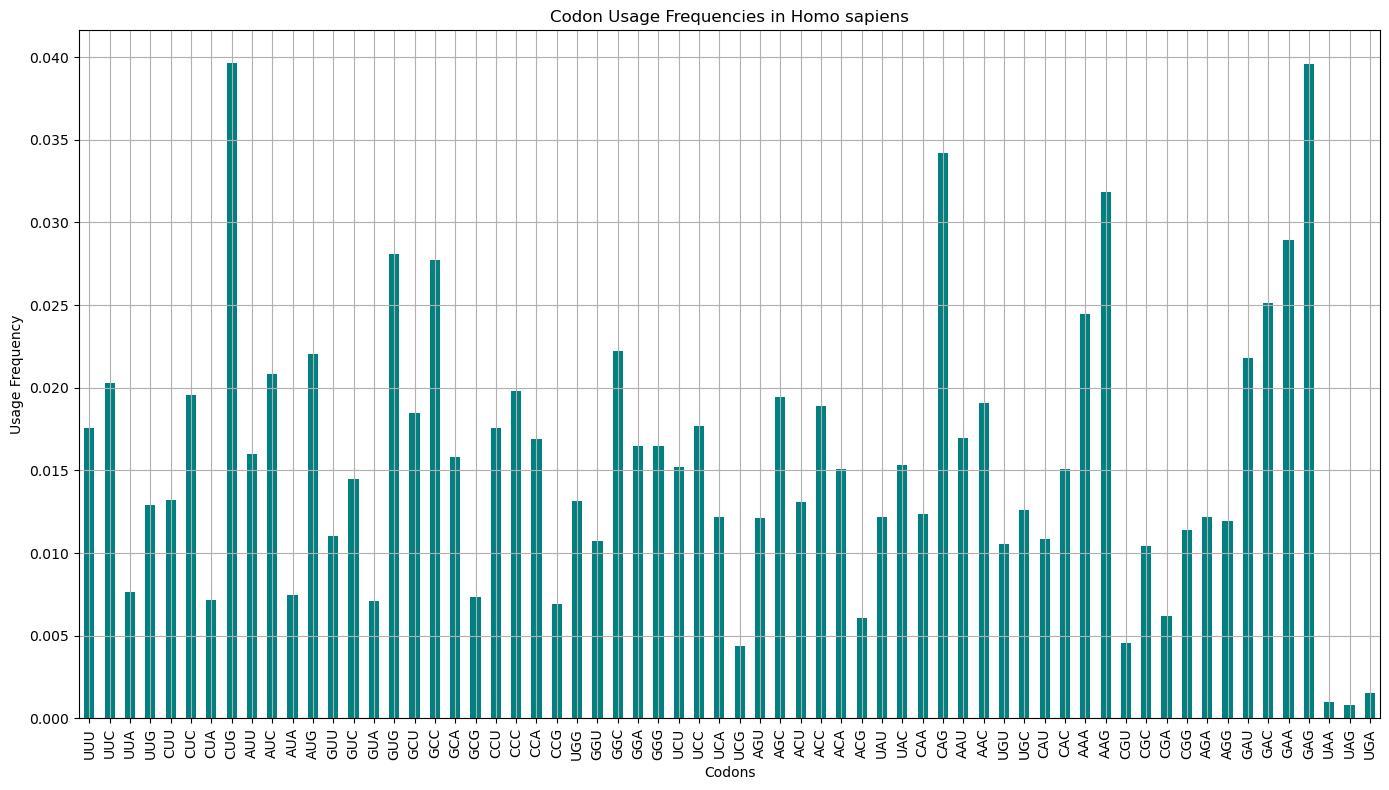

In [210]:
homo_sapiens_row = df[df['SpeciesName'] == 'Homo sapiens']

# Assuming codon columns are named 'UUU', 'UUC', etc., and these are the only three-letter column names
codon_columns = [col for col in df.columns if len(col) == 3]

# Get the codon usage values for 'Homo sapiens'
homo_sapiens_codons = homo_sapiens_row[codon_columns].iloc[0]  # Use .iloc[0] to convert the DataFrame row to a Series

# Visualization
plt.figure(figsize=(14, 8))
homo_sapiens_codons.plot(kind='bar', color='teal')
plt.title('Codon Usage Frequencies in Homo sapiens')
plt.xlabel('Codons')
plt.ylabel('Usage Frequency')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [211]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Kingdom_encoded'] = encoder.fit_transform(df['Kingdom'])
df['SpeciesName'] = encoder.fit_transform(df['SpeciesName'])

In [212]:
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom_encoded
0,vrl,0.0,100217,1995.0,2827,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,9
1,vrl,0.0,100220,1474.0,1087,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,9
2,vrl,0.0,100755,4862.0,8250,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,9
3,vrl,0.0,100880,1915.0,5479,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,9
4,vrl,0.0,100887,22831.0,7575,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,9


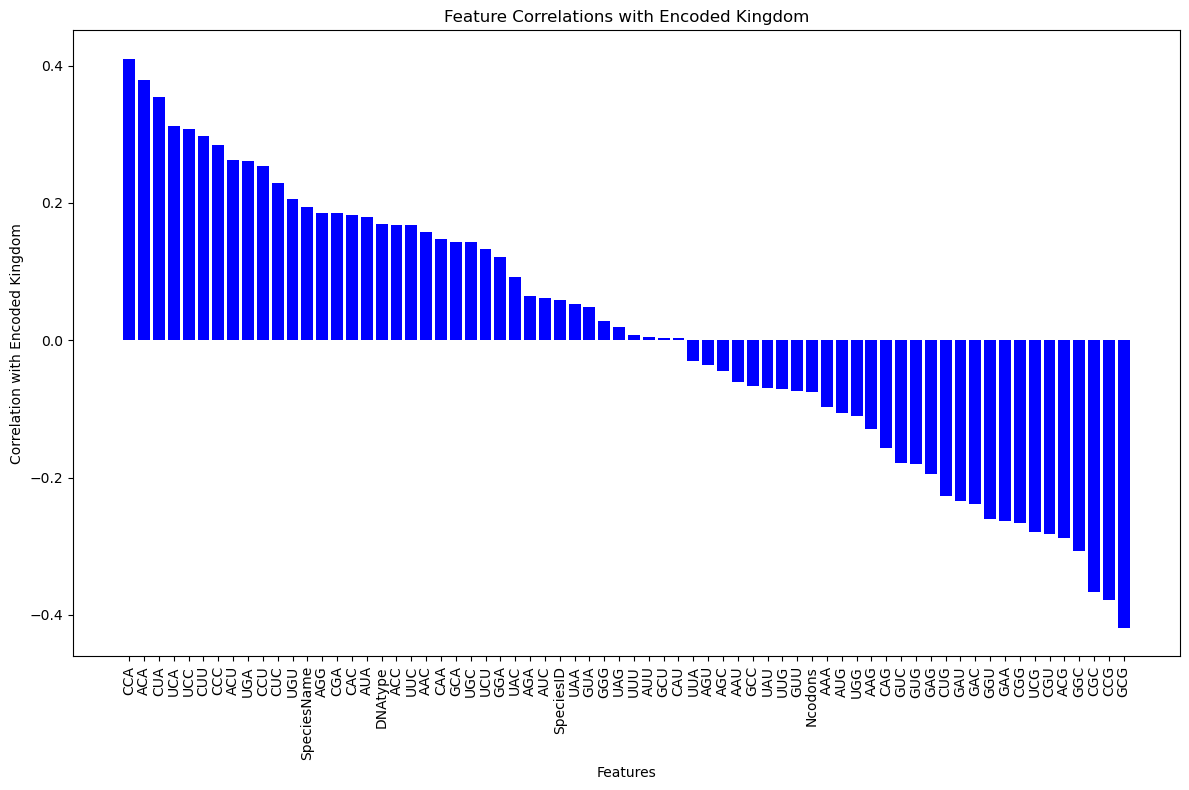

In [213]:



numeric_cols = df.select_dtypes(include=[np.number])
numeric_cols['Kingdom_encoded'] = df['Kingdom_encoded']  # Add the encoded Kingdom column to numeric dataframe

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_cols.corr()

# Extract correlations of all features with the encoded 'Kingdom' label
label_correlation = correlation_matrix['Kingdom_encoded']

# Remove the label itself from the correlation series to avoid self-correlation
label_correlation = label_correlation.drop('Kingdom_encoded')

# Sorting the features based on their correlation with the label
sorted_label_correlation = label_correlation.sort_values(ascending=False)

# Plotting all feature correlations with the encoded 'Kingdom'
plt.figure(figsize=(12, 8))  # Adjust the figure size as necessary
plt.bar(sorted_label_correlation.index, sorted_label_correlation.values, color='blue')
plt.xlabel('Features')
plt.ylabel('Correlation with Encoded Kingdom')
plt.title('Feature Correlations with Encoded Kingdom')
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.tight_layout()
plt.show()

In [214]:
df.tail()


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom_encoded
13023,pri,0.0,9601,1097.0,6304,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638,7
13024,pri,1.0,9601,2067.0,12295,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887,7
13025,pri,1.0,9602,1686.0,12296,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017,7
13026,pri,0.0,9606,40662582.0,3585,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156,7
13027,pri,1.0,9606,8998998.0,11346,0.01778,0.03724,0.01732,0.00600,0.01689,...,0.00041,0.00041,0.00451,0.01402,0.01651,0.00783,0.00156,0.00114,0.02161,7


In [215]:
import sklearn.utils
X = df.iloc[:, 3:]
y = df.iloc[:, 0]

print("X:")
print(X)
print("y:")
print(y)

X, y = sklearn.utils.shuffle(X, y, random_state=0)

print("X:")
print(X)
print("y:")
print(y)

X:
          Ncodons  SpeciesName      UUU      UUC      UUA      UUG      CUU  \
0          1995.0         2827  0.01654  0.01203  0.00050  0.00351  0.01203   
1          1474.0         1087  0.02714  0.01357  0.00068  0.00678  0.00407   
2          4862.0         8250  0.01974  0.02180  0.01357  0.01543  0.00782   
3          1915.0         5479  0.01775  0.02245  0.01619  0.00992  0.01567   
4         22831.0         7575  0.02816  0.01371  0.00767  0.03679  0.01380   
...           ...          ...      ...      ...      ...      ...      ...   
13023      1097.0         6304  0.02552  0.03555  0.00547  0.01367  0.01276   
13024      2067.0        12295  0.01258  0.03193  0.01984  0.00629  0.01451   
13025      1686.0        12296  0.01423  0.03321  0.01661  0.00356  0.01127   
13026  40662582.0         3585  0.01757  0.02028  0.00767  0.01293  0.01319   
13027   8998998.0        11346  0.01778  0.03724  0.01732  0.00600  0.01689   

           CUC      CUA      CUG  ...      AGA  

In [216]:
df['Kingdom'].unique()

array(['vrl', 'arc', 'bct', 'phg', 'plm', 'pln', 'inv', 'vrt', 'mam',
       'rod', 'pri'], dtype=object)

/opt/anaconda3/envs/csci4521/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/csci4521/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Logistic Regression: Mean accuracy=0.55, Standard deviation=0.03
K-Nearest Neighbors: Mean accuracy=0.95, Standard deviation=0.00
Random Forest: Mean accuracy=0.99, Standard deviation=0.00
SVM: Mean accuracy=0.98, Standard deviation=0.00


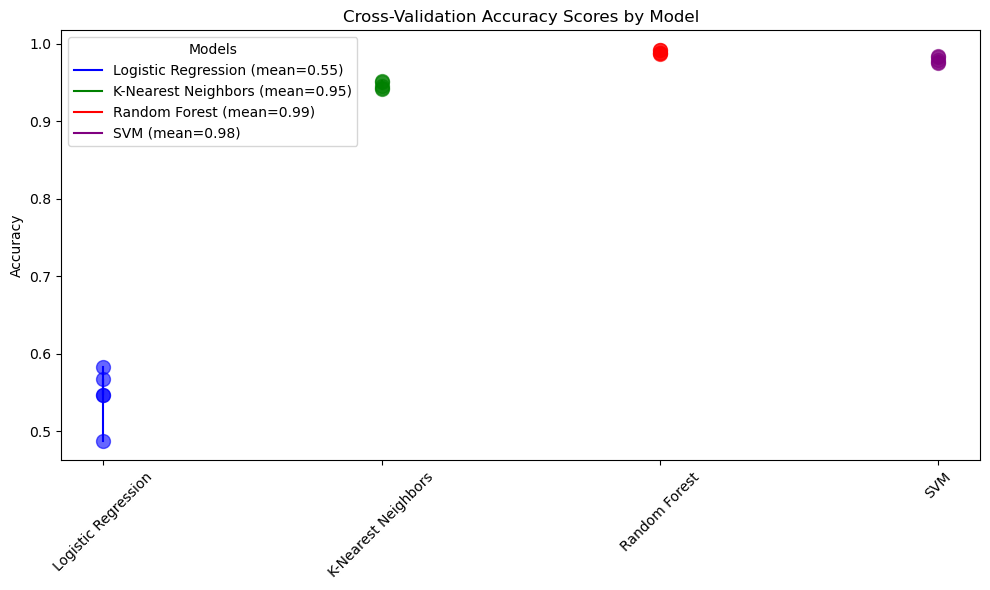

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, multi_class='multinomial', solver='lbfgs'),
    "K-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "Random Forest": RandomForestClassifier(),
    "SVM": make_pipeline(StandardScaler(), SVC())
}
kf = KFold(n_splits=5, random_state=0, shuffle=True)

results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[name] = cv_scores
    print(f"{name}: Mean accuracy={cv_scores.mean():.2f}, Standard deviation={cv_scores.std():.2f}")

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 'o', 'o', 'o']

for (name, scores), color, marker in zip(results.items(), colors, markers):
    ax.scatter([name] * len(scores), scores, alpha=0.6, c=color, marker=marker, s=100)
    ax.plot([name] * len(scores), scores, label=f"{name} (mean={scores.mean():.2f})", color=color)

ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Accuracy Scores by Model')
ax.legend(title="Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



